In [1]:
%load_ext itikz

In this article, we look at how to build modules that can be mounted in a eurorack. The international standard 19" rack system (DIN 41494 / IEC 297-3 / IEEE 1001.1) is the base for the dimension. These standards define all the parts needed to build a complete rack. here only the rails to mount the modules are used. the rails will be screwed to side panels made from wood. The size of the modules is described in U (Rack Unit) and HP (Horizontal Pitch). U is the height of the module. One U is 1.75" = 44.45mm. The modules are 3U, the total height would be 3*44.45mm=133.4mm. This would be too large when rails with lips are used. Therefore the height of the modules is 128.5mm. The HP is or 1/5" (5.08 mm). The real sizes are slightly smaller because of the tolerance of the PCB production process.
{: class="my-4"} 

# pcb size
{: class="subtitle is-lowercase"} 

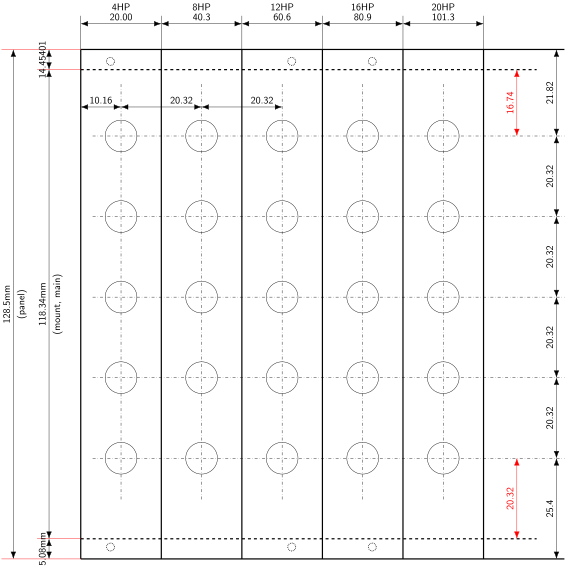

In [65]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows.meta}
\begin{document}
\begin{tikzpicture}[scale=1.4]


\fontsize{0.35cm}{0.35cm}\selectfont \sffamily

\def\PanelHeight{128.5mm}
\def\PCBHeight{108.18mm}
\def\PCBBottom{10.08mm}
\def\Spacing{5.08mm}

% draw outline
\foreach \x in {0,4,8,12,16,20} {
    \draw [very thick] (\x * \Spacing,0mm) -- (\x * \Spacing,\PanelHeight);
    \draw [thin] (\x * \Spacing,137mm) -- (\x * \Spacing,\PanelHeight);
    }
\draw [very thick] (0mm,0mm) -- (122mm,0mm);
\draw [very thick] (0mm,\PanelHeight) -- (122mm,\PanelHeight);
\draw [very thick,dashed] (0mm,\PCBBottom) -- (115mm,\PCBBottom);
\draw [very thick,dashed] (0mm,\PCBBottom + \PCBHeight) -- (115mm,\PCBBottom + \PCBHeight);

% mounting holes
% vertical grid
\foreach \x in {2,6,10,14,18} 
    \draw [thin, dash dot] (\x * \Spacing,15mm) -- (\x * \Spacing,120mm);
% horizontal grid
\foreach \y in {0,4,8,12,16} 
    \draw [thin, dash dot] (3mm,{21.82mm + (\y * \Spacing)}) -- (122mm,{21.82mm + (\y * \Spacing)});
% draw the pot/jack holes
\foreach \x in {2,6,10,14,18} 
	\foreach \y in {0,4,8,12,16} 
		\draw (\x * \Spacing,{21.82mm + (\y * \Spacing)}) circle (0.4);

% horizontal markings top
\foreach \name [count=\xi from 1)] in {4HP\\20.00, 8HP\\40.3, 12HP\\60.6, 16HP\\80.9, 20HP\\101.3}
    \draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] ({((\xi * 2) - 2) * 2 * \Spacing},135mm) -- (\xi * 4 * \Spacing,135mm) node[midway,above,align = center]{\name};
% horizontal markings mounting holes
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (0,114mm) -- (10.16mm,114mm) node[midway,above,align = center]{10.16};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (10.16mm,114mm) -- (30.48mm,114mm) node[near end,above,align = right]{20.32};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (30.48mm,114mm) -- (50.8mm,114mm) node[near end,above,align = right]{20.32};

% vertical markings
% vertical grid
\foreach \x in {0mm,\PanelHeight} 
    \draw [thin] (-20mm,\x) -- (0mm,\x);
\foreach \x in {\PCBBottom,\PCBBottom+\PCBHeight} 
    \draw [thin] (-11mm,\x) -- (0mm,\x);

\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (110mm,\PCBBottom) -- (110mm,\PCBBottom + 11.66mm) node[midway,above,align = center,rotate=90]{11.66};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (110mm,\PCBBottom + \PCBHeight - 15.24mm) -- (110mm,\PCBBottom + \PCBHeight) node[midway,above,align = center,rotate=90]{15.24};

\def\last{0}
\def\widths{{21.82,20.32,20.32,20.32,20.32,25.4}}
\foreach \y [count=\i from 0)] in {21.82mm,42.14mm,62.46mm,82.78mm,103.1mm,128.5mm} {
    \draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (120mm,\last) -- (120mm,\y) node[midway,above,align = center,rotate=90]{\pgfmathparse{\widths[\i]}\pgfmathresult};
    \global\let\last=\y
}

%vertical markings right
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-8mm,0mm) -- (-8mm,\PCBBottom) node[midway,above,align = center,rotate=90]{10.16};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-8mm,\PCBBottom) -- (-8mm,\PCBBottom+\PCBHeight) node[midway,above,align = center,rotate=90]{108.18} node[midway,below,align = center,rotate=90]{(mount, main)};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-8mm,\PCBBottom + \PCBHeight) -- (-8mm,\PanelHeight) node[midway,above,align = center,rotate=90]{10.16};

\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-17mm,0mm) -- (-17mm,\PanelHeight) node[midway,above,align = center,rotate=90]{128.5} node[midway,below,align = center,rotate=90]{(panel)};

%mounting holes
\foreach \x in {7.5mm,53.22mm,73.54mm} {
    \draw[black,thick,densely dotted] (\x,3mm) circle (0.1);
    \draw[black,thick,densely dotted] (\x,128.5mm-3mm) circle (0.1);
    }

\end{tikzpicture}
\end{document}


In [3]:
from IPython.core.display import display, HTML
display(HTML('''
<div class="hero is-halfheight mb-4" style="background: url('{{ '/assets/vermarkung_files/rails.jpg' | relative_url }}') no-repeat center center; background-size: cover; background-attachment: fixed;">
   <div class="hero-body">
        <div class="content has-text-centered">
        </div>
    </div>
</div>
'''))

# panel mounting holes
{: class="subtitle is-lowercase my-4"}

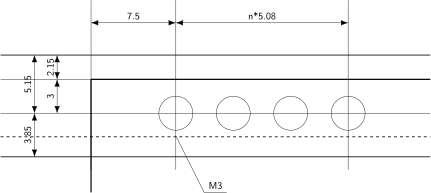

In [66]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows.meta}
\begin{document}
\begin{tikzpicture}[scale=4]

\fontsize{0.35cm}{0.35cm}\selectfont \sffamily

%panel border
\draw [very thick] (0,0) -- (30mm,0mm);
\draw [very thick] (0,0) -- (0mm,-12mm);
%vertical measure lines
\draw [thin] (0mm,6mm) -- (0mm,-8mm);
\draw [thin] (7.5mm,6mm) -- (7.5mm,-7mm);
\draw [thin] (7.5mm+15.24mm,6mm) -- (7.5mm+15.24mm,-8mm);
%horizontal measure lines
\draw [thin] (-4mm,0mm) -- (30mm,-0mm);
\draw [thin] (-6mm,-3mm) -- (30mm,-3mm);

% the rail
\draw [thick] (-8mm,-6.85mm) -- (30mm,-6.85mm);
\draw [thick] (-8mm,2.15mm) -- (30mm,2.15mm);
\foreach \x in {2.42mm,7.5mm,12.58mm,17.66mm,22.74mm} 
    \draw (\x,-3mm) circle (0.15);

%pcb border
\draw [thick,dashed] (0mm,2*-5.08mm) -- (30mm,2*-5.08mm);

%markings
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (0mm,5mm) -- (7.5mm,5mm) node[midway,above,align = center]{7.5};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (7.5mm,5mm) -- (7.5mm+15.24mm,5mm) node[midway,above,align = center]{n*5.08};

\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-3mm,0mm) -- (-3mm,2.15mm) node[midway,above,align = center,rotate=90]{2.15};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-3mm,0mm) -- (-3mm,-3mm) node[midway,above,align = center,rotate=90]{3};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-5mm,-3mm) -- (-5mm,-6.85mm) node[midway,above,align = center,rotate=90]{3.85};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-5mm,-3mm) -- (-5mm,2.15mm) node[midway,above,align = center,rotate=90]{5.15};

%hole size
\draw [thin] (7.5mm,-5mm) -- (10mm,-10mm);
\draw [thin] (10mm,-10mm) -- (12mm,-10mm) node[midway,above,align = center]{M3};


\end{tikzpicture}
\end{document}



The panel mounting holes are placed 7.5mm from the left side of the panel and 3mm from the top and bottom. The mounting holes must be in steps of 5.08mm. There is always one mounting hole on the left of the panel. On the right side, there is one when the panel is equal to or larger than 8 HP. To assemble the modules on the rails M3x6 cap screws are used.
{: class="my-4"} 



In [5]:
from IPython.core.display import display, HTML
display(HTML('''
<div class="hero is-halfheight mb-4" style="background: url('{{ '/assets/vermarkung_files/construction.jpg' | relative_url }}') no-repeat center center; background-size: cover; background-attachment: fixed;">
   <div class="hero-body is-halfheight">
        <div class="content">
        </div>
    </div>
</div>
'''))

# mount holes for stacking
{: class="subtitle is-lowercase my-4"}

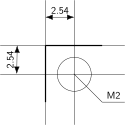

In [6]:
%%itikz --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows.meta}
\begin{document}
\begin{tikzpicture}[scale=4]

\fontsize{0.35cm}{0.35cm}\selectfont \sffamily

\draw [very thick] (0,0) -- (5mm,0mm);
\draw [very thick] (0,0) -- (0mm,-5mm);
\draw (2.54mm,-2.54mm) circle (0.15);

\draw [thin] (0mm,4mm) -- (0mm,-7mm);
\draw [thin] (2.54mm,4mm) -- (2.54mm,-7mm);
\draw [thin] (-4mm,0mm) -- (7mm,-0mm);
\draw [thin] (-4mm,-2.54mm) -- (7mm,-2.54mm);

\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (0mm,2.5mm) -- (2.54mm,2.5mm) node[midway,above,align = center]{2.54};
\draw[thin,{Latex[scale=1.5]}-{Latex[scale=1.5]}] (-2.5mm,0mm) -- (-2.54mm,-2.5mm) node[midway,above,align = center,rotate=90]{2.54};

\draw [thin] (2.5mm,-2.5mm) -- (5mm,-5mm);
\draw [thin] (5mm,-5mm) -- (7mm,-5mm) node[midway,above,align = center]{M2};

\end{tikzpicture}
\end{document}

The mounting holes for stacking the main and mount PCB are 1 inch or 2.54mm from the sides. Modules are only stackable if the width is equal to or larger than 8HP. For stacking the modules M2/15mm standoffs and screws are used.
{: class="my-4"} 


In [7]:
from IPython.core.display import display, HTML
display(HTML('''
<div class="hero is-medium mb-4" style="background: url('{{ '/assets/vermarkung_files/panel_mount.jpg' | relative_url }}') no-repeat center center; background-size: cover; background-attachment: fixed;">
   <div class="hero-body">
        <div class="content has-text-centered">
        </div>
    </div>
</div>
'''))

# construction summary
{: class="subtitle is-lowercase my-4"}

in this table, there is a summary of the sizes and panel mount hole positions. the lines in bold are the sizes usually used to construct modules.
{: class="my-4"}

| Module width [HP] |  calculated width [mm]                                | width [mm]               | Mounting Holes [mm] |
|------------------ |------------------------------------------------------ |------------------------- | ------------- |
| 1                 | 5.08                                                  | 5.00                     | |
| 1.5               | 7.62                                                  | 7.50                     | |
| 2                 | 10.16                                                 | 9.80                     | |
| **4**             | **20.32**                                             | **20.00**                | **7.5** |
| 6                 | 30.48                                                 | 30.00                    | |
| **8**             | **40.64**                                             | **40.30**                | **7.5** |
| 10                | 50.80                                                 | 50.50                    | |
| **12**            | **60.96**                                             | **60.60**                | **7.5, 50.8** |
| 14                | 71.12                                                 | 70.80                    | |
| **16**            | **81.28**                                             | **80.90**                | **7.5, 71.12** |
| 18                | 91.44                                                 | 91.30                    | |
| **20**            | **101.60**                                            | **101.30**               | **7.5, 50.8, 91.44** |
| 21                | 106.68                                                | 106.30                   | |
| 22                | 111.76                                                | 111.40                   | |
| 28                | 142.24                                                | 141.90                   | |
| 42                | 213.36                                                | 213.00                   | |
{: class="table is-fullwidth is-striped is-hoverable is-narrow has-text-centered"}


# side panels
{: class="subtitle is-lowercase my-4"}

The side panels are made of wood and the rails hold them together. The construction of the panels can be done with the PDF template.
{: class="my-4"} 


## referrences
{: class="subtitle is-lowercase"}

* [Doepfer](http://www.doepfer.de/a100_man/a100m_e.htm) A-100 construction details.
* [Schroff Eurorack Datasheet]({{ '/assets/vermarkung_files/Europac_eng_datasheet.pdf' | relative_url }}) Information about eurorack components.
* The openscad [files]({{ '/assets/vermarkung_files/rack.scad' | relative_url }}) for the rack.
* [Schablone]({{ '/assets/vermarkung_files/rack.pdf' | relative_url }}) for the rack panels. 